In [1]:
pip install numpy pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.svm import LinearSVC

In [4]:
# Load datasets
import pandas as pd
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [5]:
# observe the first 5 rows of true News
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
data_fake['text'][4]

'Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered his message just days after members of the United Nations condemned Trump s move to recognize Jerusalem as the capital of Israel. The Pontiff prayed on Monday for the  peaceful coexistence of two states within mutually agreed and internationally recognized borders. We see Jesus in the children of the Middle East who continue to suffer because of growing tensions between Israelis and Palestinians,  Francis said.  On this festive day, let us ask the Lord for peace for Jerusalem and for all the Holy Land. Let us pray that the will to resume dialogue may prevail between the parties and that a negotiated solution can finally be reached. The Pope went on to plead for acceptance of refugees who have been forced from their homes, and that is an issue Trump continues to fight against. Francis used Jesus for which there was  no place in the inn  as an analogy. Today, as

In [7]:
# Observe the first 5 rows of true news
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
# create our target variable for both data frames
# if news article is fake it will be denoted as 0
data_fake['class'] = 0
# if news article is true it will be denoted as 1
data_true['class'] = 1

In [9]:
data_fake.head(3)


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [10]:
# shape of both data frames
data_fake.shape, data_true.shape, 

((23481, 5), (21417, 5))

In [11]:
# putting last 10 rows of fake news into a data frame
data_fake_manual_testing = data_fake.tail(10)

# dropping the last 10 rows of fake news from original fake news df
for i in range(23480, 23470, -1):
    data_fake.drop([i], axis = 0, inplace = True)

# putting last 10 rows of true news into a data frame
data_true_manual_testing = data_true.tail(10)

# dropping the last 10 rows of fake news from original fake news df
for i in range(21416, 21406, -1):
    data_true.drop([i], axis = 0, inplace = True)


In [12]:
# check both data frames dimensions after dropping the last 10 rows
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [13]:
# looking at the 10 fake news observations we placed in a data frame
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [14]:
# look at the 10 observations of true news we placed in a dataframe
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [15]:
# combine the 2 data frames containing both fake and true news 
# combing the two frames on the rows axis
data_merge = pd.concat([data_fake,data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [16]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [17]:
# dropping the columns title, subject, date and putting into a new data frame
# only keeping the text and class
text = data_merge.drop(['title','subject','date'], axis = 1)

In [18]:
# check for missing values
text.isna().sum()

text     0
class    0
dtype: int64

In [19]:
# shuffle our data frame
text = text.sample(frac = 1)
text.head()

,text,class
17759,DUBLIN (Reuters) - The unlikely choice of Arge...,1
17207,"TUNIS (Reuters) - Saif al-Islam Gaddafi, the m...",1
4375,"Residents in Aurora, Indiana are upset after s...",0
19741,Many of the hacks on this list like Rachel Mad...,0
12329,These disrespectful crybabies are in for a rud...,0


In [20]:
# reset the index
text.reset_index(inplace = True)

# drop the old index
text.drop(['index'], axis = 1, inplace = True)

In [21]:
# recall we only kept text and class for the data frame
text.columns

Index(['text', 'class'], dtype='object')

In [22]:
# observing the shuffled and new index data frame
text.head()

,text,class
0,DUBLIN (Reuters) - The unlikely choice of Arge...,1
1,"TUNIS (Reuters) - Saif al-Islam Gaddafi, the m...",1
2,"Residents in Aurora, Indiana are upset after s...",0
3,Many of the hacks on this list like Rachel Mad...,0
4,These disrespectful crybabies are in for a rud...,0


In [23]:
# first observation text
text['text'][3]

'Many of the hacks on this list like Rachel Maddow, Mark Halperin, Diane Sawyer and George Stephanoplous are expected, as they pretty much openly pander to Hillary and Bill Clinton. However, some of the names on this list provided by Wikileaks, who have colluded with the Clinton camp in some way, may surprise you A few of the  journalists  meeting offline with Hillary advisersThanks to Wikileaks we now know that at least 65 mainstream reporters were working closely with the Clinton campaign this election year. They were invited to top elitist dinners with Hillary Campaign Chairman John Podesta or Chief Campaign strategist Joel Benenson.NO FOX NEWS REPORTERS MADE THE LIST!These 65 mainstream reporters CAN NEVER BE TRUSTED:As previously reported  At least 38 top national reporters attended a different dinner at John Podesta s house in April 2015.The Clinton campaign sent out invites to New York reporters in April 2015 on their off-the-record meeting on how to sell Hillary Clinton to the 

In [24]:
# create a function to process text
import re
import string
def wordopt(text):
    text = text.lower() # lower case 
    text = re.sub('\[.*?\]','',text) # remove anything with and within brackets
    text = re.sub('\\W',' ',text) # removes any character not a letter, digit, or underscore
    text = re.sub('https?://\S+|www\.\S+','',text) # removes any links starting with https
    text = re.sub('<.*?>+','', text) # removes anything with and within < >
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # removes any string with % in it 
    text = re.sub('\n','',text) # remove next lines
    text = re.sub('\w*\d\w*','', text) # removes any string that contains atleast a digit with zero or more characters
    return text

<>:6: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:12: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:12: SyntaxWarning: invalid escape sequence '\w'
C:\Users\loonl\AppData\Local\Temp\ipykernel_2840\2853833357.py:6: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]','',text) # remove anything with and within brackets
C:\Users\loonl\AppData\Local\Temp\ipykernel_2840\2853833357.py:8: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+','',text) # removes any links starting with https
C:\Users\loonl\AppData\Local\Temp\ipykernel_2840\2853833357.py:12: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*','', text) # removes any string that contains atleast a digit with zero or more characters


In [25]:
# apply the function to the text column
text['text'] = text['text'].apply(wordopt)

In [26]:
# observing the updated text
text['text'][0]

'dublin  reuters    the unlikely choice of argentinian communist guerrilla leader ernesto  che  guevara  hero of the cuban revolution  as the face of the new  euro postage stamp in ireland is stoking controversy on both sides of the atlantic  the traditionally catholic country  which has never had a left wing government  only established diplomatic relations with cuba in    years after guevara helped lead the cuban revolution with fidel castro   however guevara s father  ernesto guevara lynch  was a civil engineer of irish descent   and the iconic red and black print of the long haired che known from t shirts and posters around the world was produced by an irish artist  jim fitzpatrick  on this basis ireland s postal service this week issued the new stamp featuring fitzpatrick s image of guevara to mark the  anniversary of his death   the postal service described guevara  killed by cia backed bolivian soldiers in bolivia in   as  the quintessential left wing revolutionary   it said dem

In [27]:
# our predictor variable
X = text['text']

# our target variable
y = text['class']

In [28]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score

# instantiate our TfidfVectorizer
vc = TfidfVectorizer()

# fit transform our document (X_train)
# x_train_cv
tfidf_train = vc.fit_transform(X_train) 

# transform our X_test 
# note we dont have to fit the testing set
# X_test_cv
tfidf_test = vc.transform(X_test)

In [30]:
# print the matrix output of the tfidf
print(tfidf_train.toarray())

MemoryError: Unable to allocate 21.7 GiB for an array with shape (31414, 92637) and data type float64

In [31]:
import joblib
joblib.dump(vc, 'tfidfVectorizer.joblib')

['tfidfVectorizer.joblib']

In [32]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression Model 
lr = LogisticRegression(random_state = 0)

# fit our model with the outputed tfidf training set
lr.fit(tfidf_train, y_train)

# predict the class on the tfidf testing set
pred_lr = lr.predict(tfidf_test)

# print the predictions
print(pred_lr) 


[0 0 1 ... 0 0 1]


In [33]:
# check the accuracy score on the testing set
lr.score(tfidf_test, y_test)

0.9863339275103981

In [34]:
# classification report 
from sklearn.metrics import classification_report
print(classification_report(pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7106
           1       0.99      0.98      0.99      6358

    accuracy                           0.99     13464
   macro avg       0.99      0.99      0.99     13464
weighted avg       0.99      0.99      0.99     13464



In [35]:
joblib.dump(lr, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

Accuracy: 0.986
Precision: 0.983
Recall: 0.988
F1 Score: 0.985


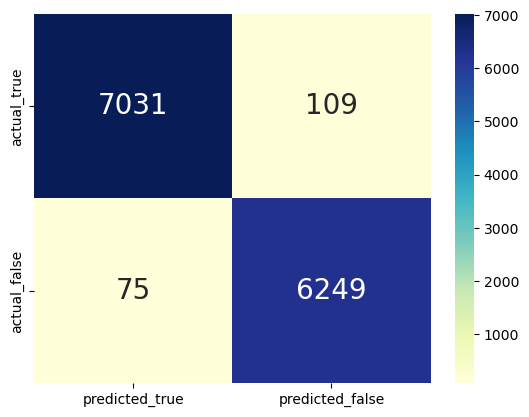

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred_lr)   #y_test is the label of testing data, y_pred_cv is the predicted ans from the ML with testing set
sns.heatmap(cm, xticklabels=['predicted_true', 'predicted_false'], yticklabels=['actual_true', 'actual_false'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

In [37]:
# Use a Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
import numpy as np

nb = MultinomialNB()

# Train the model
nb.fit(tfidf_train, y_train)

# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv
pred_nb = nb.predict(tfidf_test)
pred_nb # This output is all of the predictions



array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [38]:
print(classification_report(pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7246
           1       0.93      0.94      0.93      6218

    accuracy                           0.94     13464
   macro avg       0.94      0.94      0.94     13464
weighted avg       0.94      0.94      0.94     13464



Accuracy: 0.938
Precision: 0.941
Recall: 0.926
F1 Score: 0.933


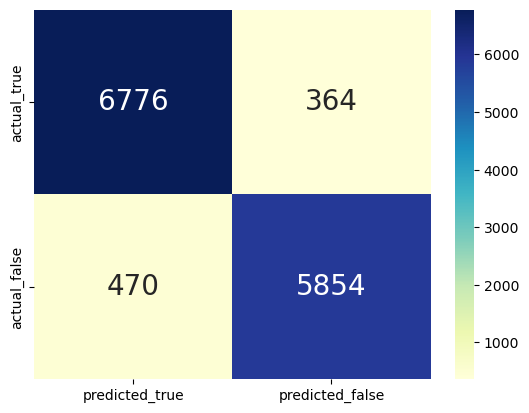

In [39]:
cm = confusion_matrix(y_test, pred_nb)

sns.heatmap(cm, xticklabels=['predicted_true', 'predicted_false'], yticklabels=['actual_true', 'actual_false'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

NBscore = nb.score(tfidf_test, y_test)

In [40]:
# import Random Forest Classifier from sklearn 
from sklearn.ensemble import RandomForestClassifier

# instantiate our model 
rf = RandomForestClassifier(random_state = 0)
# train our model on training data
rf.fit(tfidf_train,y_train)

# get predictions using random forest classifier
pred_rf = rf.predict(tfidf_test)

# get accuracy score on testing set
rf.score(tfidf_test, y_test)


0.9905674390968509

In [41]:
# Classification report
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7140
           1       0.99      0.99      0.99      6324

    accuracy                           0.99     13464
   macro avg       0.99      0.99      0.99     13464
weighted avg       0.99      0.99      0.99     13464



Accuracy: 0.991
Precision: 0.991
Recall: 0.989
F1 Score: 0.99


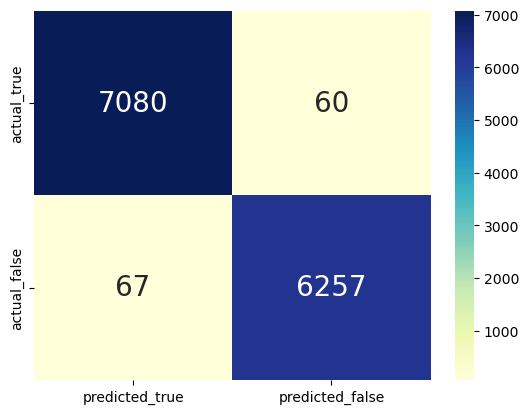

In [42]:
cm = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm, xticklabels=['predicted_true', 'predicted_false'], yticklabels=['actual_true', 'actual_false'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

NBscore = nb.score(tfidf_test, y_test)

In [43]:
# function to to check the predicted class and return a string whether its a fake or true news
def output_label(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Real News"

# functions that gets a input of news(text) and does the same steps as above
# we get the news and put into a dataframe 
# we get the news text and clean it 
# we get the clean text and tfidf the text
# predict the news using the models we used
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(wordopt)
    new_x_test = new_def_test['text']
    new_tfidf_test = vc.transform(new_x_test)
    pred_lr = lr.predict(new_tfidf_test)
    pred_nb = nb.predict(new_tfidf_test)
    pred_rf = rf.predict(new_tfidf_test)
    
    return print("\n\n Logistic Regression Prediction: {} \n Naive Bayes Prediction: {} \n Random Forest Prediction: {}".format(
        output_label(pred_lr[0]), 
        output_label(pred_nb[0]), 
        output_label(pred_rf[0])))                                                                                                                                                                   
                                                                                                                                                                   

In [44]:
# observe an example of true news that we reserved in the beginning
data_fake_manual_testing['text'].values[2]

'Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, 

In [45]:
# observe an example of fake news that we reserved in the beginning
data_true_manual_testing['text'].values[3]

'COPENHAGEN (Reuters) - Danish police said on Tuesday the size of a headless female torso found on the sea s edge in Copenhagen suggested it could be that of a Swedish journalist who died after taking a submarine ride with the vessel s Danish inventor. Police said divers were still searching the area and they were investigating reports of other body parts that may have been spotted in Copenhagen harbor. Danish inventor Peter Madsen has been charged with killing Kim Wall, a Swedish journalist, in his home-made submarine.   We re dealing with a torso where arms, legs and head were cut off deliberately. The length of the torso doesn t speak against it being Kim Wall, but we still don t know,  Copenhagen police spokesman Jens Moller said in a video statement. Madsen told a court she had died in an accident on board the submarine and that he had buried her at sea, changing his earlier statement that he dropped her off alive in Copenhagen. Police are conducting DNA tests to identify the tors

In [49]:
# make the user put an input of news 
news = str(input())
# gets the users input and checks if the news is fake or real
manual_testing(news)

 PETALING JAYA: The Malaysian Anti-Corruption Commission has busted a syndicate in Sibu, Sarawak, which smuggled subsidised diesel overseas and paid off enforcement officers to keep their operation going.  MACC chief Azam Baki said the misappropriated diesel was meant for fishermen and the syndicate had been operating since 2012 and is believed to have pocketed RM400 million since then.  “The syndicate is believed to have transferred the diesel from tankers designated for fishermen into barges docked at an oil depot for fishermen in Sungai Bidut, Sibu.  The diesel in the barges is then transferred at night into foreign ships owned by the purchasers, to prevent the authorities from sniffing them out, he said in a statement.  A raid on the depot by MACC’s special operations unit and tactical squad, along with officers from the domestic trade and cost of living ministry, led to the arrests of five people and 1.6 million litres in diesel being seized.  Also confiscated were two barges dock



 Logistic Regression Prediction: Real News 
 Naive Bayes Prediction: Real News 
 Random Forest Prediction: Real News
